In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Fahrplan", sep = "\t", encoding='latin-1')
data

,Unnamed: 0,Date,TimeSedanstrasse,DelaySedanstrasse,TimeLeimbach,DelayLeimbach,TimeLandwehrplatz,DelayLandwehrplatz,TimeAlterMarkt,DelayAlterMarkt,...,TimeBremerstrasse,DelayBremerstrasse,TimeRostockerstrasse,DelayRostockerstrasse,TimeGreifswalderstrasse,DelayGreifswalderstrasse,TimeStralsunderstrasse,DelayStralsunderstrasse,TimeHansastrasse,DelayHansastrasse
0,287,04.05.2020,05:57,0,06:03,0,06:06,0,06:10,0,...,06:51,0,06:52,0,06:53,0,06:54,0,06:55,0
1,411,04.05.2020,06:17,0,06:23,0,06:26,0,06:30,0,...,07:11,0,07:12,NaN,07:13,0,07:14,0,07:15,0
2,535,04.05.2020,06:37,0,06:43,0,06:46,NaN,06:50,0,...,07:31,0,07:32,0,07:33,0,07:34,0,07:35,0
3,659,04.05.2020,06:57,0,07:03,1,07:06,0,07:10,0,...,07:51,0,07:52,0,07:53,0,07:54,0,07:55,0
4,783,04.05.2020,07:17,0,07:23,1,07:26,1,07:30,NaN,...,08:11,4,08:12,4,08:13,4,08:14,2,08:15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,1225,24.07.2020,17:57,0,18:03,0,18:06,0,18:10,0,...,18:51,0,18:52,0,18:53,0,18:54,0,18:55,0
2128,1349,24.07.2020,18:17,0,18:23,0,18:26,0,18:30,0,...,19:11,NaN,19:12,0,19:13,0,19:14,0,19:15,0
2129,1473,24.07.2020,18:37,0,18:43,0,18:46,0,18:50,0,...,19:31,1,19:32,1,19:33,1,19:34,0,19:35,0
2130,1597,24.07.2020,18:57,0,19:03,2,19:06,1,19:10,2,...,19:51,NaN,19:52,0,19:53,0,19:54,0,19:55,0


In [3]:
#Fehlende Werte mit Delay der vorherigen Haltestelle füllen
column_names = list(data)
column_names.remove("Date")
for i in column_names:
    if (not "Delay" in i):
        column_names.remove(i)
for column in column_names:
    if ("Delay" in column):
        data = data[data[column] != "fällt aus"]
        data = data[data[column] != "fÃ¤llt aus"]
        data = data[data[column] != "f?ñllt aus"]
        data = data[data[column] != "f?â?ñllt aus"]
        if ("Sedan" not in column):
            data[column] = pd.to_numeric(data[column]).fillna(pd.to_numeric(data[column_names[column_names.index(column) - 1]]))
        else:
            data[column] = pd.to_numeric(data[column]).fillna(0)            

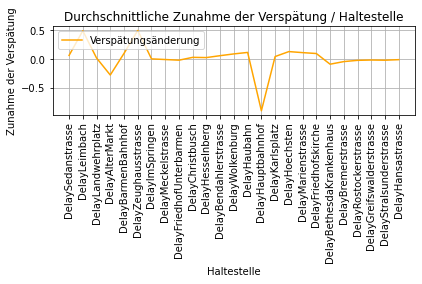

In [4]:
#Für jede Haltestelle Differenz mit Delay vorheriger Haltestelle erstellen
DelaySpawn = []
Haltestelle = []
for column in column_names:
    if ("Delay" in column):
        Haltestelle.append(column)
        if("Sedan" in column):
            DelaySpawn.append(data[column].mean())
            continue
        data["Difference" + str(column) + str(column_names[column_names.index(column) - 1])] = (pd.to_numeric(data[column]) - pd.to_numeric(data[column_names[column_names.index(column) - 1]]))
        DelaySpawn.append((data["Difference" + str(column) + str(column_names[column_names.index(column) - 1])].mean()))
plt.plot(Haltestelle,DelaySpawn, color = "orange", label = "Verspätungsänderung")
plt.xticks(rotation = "vertical")
plt.grid()
plt.legend(loc = "upper left")
plt.xlabel("Haltestelle")
plt.ylabel("Zunahme der Verspätung")
plt.title("Durchschnittliche Zunahme der Verspätung / Haltestelle")
plt.tight_layout()
# plt.savefig("Durchschnittliche Zunahme der Verspätung", dpi = 200)